In [1]:
import pandas as pd

# Tabela de zona

In [2]:
df_zona = pd.read_excel('vendedores_zonas.xlsx')
df_zona.columns


Index(['Unnamed: 0', 'id_fornecedor_x', 'nome_fornecedor', 'data_registro',
       'qtde_produtos', 'preco_medio', 'avaliacao_media', 'e_aprovado',
       'nome_empresa', 'id_endereco', 'delivery_raio_km', 'delivery_sistema',
       'hora_abertura', 'hora_fechamento', 'data_aprovacao', 'data_reprovacao',
       'bairro', 'ponto_referencia', 'cidade', 'estado_x', 'uf', 'pais_x',
       'tipo', 'cep', 'id_cidade', 'esta_disponivel', 'Zona', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

# Tabela de vendedores

In [3]:
df_vend = pd.read_csv('tb_vendors.csv', sep=';')
df_vend

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,delivery_sistema,hora_abertura,hora_fechamento,data_aprovacao,data_reprovacao
0,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,THIRD_PARTY,05:30,19:00,2021-06-01 16:22:09,2021-08-10 15:40:47
1,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,NaN,08:00,18:00,2021-02-16 18:25:45,2021-09-09 13:45:56
2,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,NaN,08:00,19:00,2021-08-16 21:06:05,2021-06-25 17:22:33
3,5f5bc310b8742200213bda1d,Re doces,2020-09-11 01:07:10,0,0,0,True,Rdysts Cury Mwchslsyy,5f5bc310b8742200213bda1e,15,NaN,10:00,17:00,2020-09-30 17:13:38,NaN
4,5f5bd2fcb8742200213bda24,Doceria Luz,2020-09-11 01:07:10,0,0,0,False,Psmdlls Crwstwys Luz 08949458667,5f5bd2fcb8742200213bda25,13,THIRD_PARTY,11:00,17:00,2021-04-26 20:55:50,2021-04-26 20:55:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,617f18ea171c740022e5b2cb,Taste Of Europe,2021-10-31 22:27:20,0,0,0,True,Tsstd hf Uurhpd,617f18ea171c740022e5b2cc,15,NaN,11:30,22:00,2021-11-09 21:01:28,2021-11-09 20:00:08
399,6181ce32f12a6200229d0682,Sabores da Dori,2021-11-02 23:24:58,0,0,0,False,UBUBS DU SOUZR OLIVUIRR 03213674800,6181ce32f12a6200229d0683,15,NaN,19:00,22:30,NaN,NaN
400,61832784b830240022a6f822,dfghfhfg hfghfgh,2021-11-03 13:41:19,0,0,0,False,gfhh ghfghfdgh fhfdhg,61832784b830240022a6f823,20,NaN,07:30,18:30,NaN,NaN
401,61840f073b5a1b00225b15fa,QUITUTES ERIKAA,2021-11-04 14:11:14,0,0,0,False,URIKR PRULR DU JUSUS 31756172803,61840f073b5a1b00225b15fb,20,NaN,07:30,18:30,NaN,NaN


### Transformando campos de data em datetime

In [4]:
df_vend['data_aprovacao']= pd.to_datetime(df_vend['data_aprovacao'],dayfirst=False).dt.strftime('%Y-%m-%d')
df_vend['data_reprovacao'] = pd.to_datetime(df_vend['data_reprovacao'],dayfirst=False).dt.strftime('%Y-%m-%d')

## Substituindo valores NaN em data de reprovação

In [5]:
df_vend['data_reprovacao'].fillna('ativo', inplace=True)

In [6]:
df_vend_ativo = df_vend.loc[df_vend['e_aprovado']==True]
df_vend_ativo.reset_index(inplace=True,drop=True)

In [7]:
df_vend_ativo

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,delivery_sistema,hora_abertura,hora_fechamento,data_aprovacao,data_reprovacao
0,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,NaN,08:00,19:00,2021-08-16,2021-06-25
1,5f5bc310b8742200213bda1d,Re doces,2020-09-11 01:07:10,0,0,0,True,Rdysts Cury Mwchslsyy,5f5bc310b8742200213bda1e,15,NaN,10:00,17:00,2020-09-30,ativo
2,5f5bd45eb8742200213bda26,Cakeria Teté Parizi,2020-09-11 01:07:10,0,0,0,True,Stdphsywd Psrwzw Chyfdwtsrws,5f5bd45eb8742200213bda27,38,NaN,10:00,19:00,2021-07-22,2021-07-12
3,5f5bfb14b8742200213bda2b,L’atelier de Tuca,2020-09-11 01:07:10,0,0,0,True,L’stdlwdr dd Tucs,5f5bfb14b8742200213bda2c,20,SELF_DELIVERY,09:00,17:00,2021-01-06,2020-12-30
4,5f601c9d70be91002137eb5c,Drika Doces e Bolos Caseiros,2020-09-14 23:13:27,0,0,0,True,Rdrwsys Rdws Ssyths,5f601c9d70be91002137eb5d,6,THIRD_PARTY,09:00,18:00,2021-06-25,2021-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,61634d8632857d002250e095,Charlotte Mesquita doces afetivos,2021-10-10 17:32:15,0,0,0,True,Ksrwyd Rhdrwguds Mdsquwts,61634d8632857d002250e096,12,NaN,08:00,17:00,2021-10-18,2021-10-18
127,616f1fd1fc52930022bc3732,Dragê Confeitaria,2021-10-19 01:01:02,0,0,0,True,Drsgê Chyfdwtsrws,616f1fd1fc52930022bc3733,15,NaN,11:00,20:00,2021-11-09,2021-11-09
128,6179d62a195b8f002217430a,Claud's Doces Bolos,2021-10-26 22:17:12,0,0,0,True,Clsudwyéws Pdwxhth Psulwyh,6179d62a195b8f002217430b,13,NaN,09:30,19:00,2021-10-29,2021-10-28
129,617ac2c38bab8700222dbabe,"Tem Doce, Moça?",2021-10-27 23:06:11,0,0,0,True,"Tdm Dhcd, Mhçs?",617ac2c38bab8700222dbabf,15,NaN,14:00,21:30,2021-11-10,2021-11-10


# Merge vendedor com endereço tb_address


In [8]:
df_adress = pd.read_csv('tb_addresses.csv', sep=';')
df_adress

,id_endereco,id_fornecedor,bairro,ponto_referencia,cidade,estado,uf,pais,tipo,cep
0,6158e903c044d80022ae40b9,NaN,Conjunto Adalberto Sena,NaN,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
1,615b312b53c10b002275d928,NaN,Nova Estacao,NaN,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
2,60c2de7e52f4f30021f53891,NaN,Terminal Cadeia Velha,NaN,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
3,60e4f879a3d5dd0021ac84bf,NaN,Vitoria,Greengard,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
4,60f5f30476d90d00217f60a3,NaN,Primavera,NaN,Arapiraca,Alagoas,AL,Brasil,HISTORY,57300001.0
...,...,...,...,...,...,...,...,...,...,...
87212,618a6a658703660022888b2b,NaN,Brooklin,NaN,São Paulo,São Paulo,SP,Brasil,HISTORY,NaN
87213,618a920f87036600228965dc,NaN,Cerqueira César,NaN,São Paulo,São Paulo,SP,Brasil,HISTORY,NaN
87214,618ad54487036600228b2902,NaN,Piedade,NaN,Rio de Janeiro,Rio de Janeiro,RJ,Brasil,HISTORY,NaN
87215,618c074524f5f60022d140c3,NaN,Brooklin,NaN,São Paulo,São Paulo,SP,Brasil,HISTORY,NaN


In [9]:
df_empresa_end = df_adress.merge(df_vend_ativo, how='inner', on='id_endereco') 
df_empresa_end.drop(columns=['id_fornecedor_y'],inplace=True)

In [10]:
df_empresa_end.rename(columns={'id_fornecedor_x':'id_fornecedor'}, inplace=True) 

# Tabela de preço produtos

In [12]:
preco_m = pd.read_csv('tb_ordered_products.csv', sep=';')
preco_m.rename(columns={'subtotal':'qde_gasto_cliente'}, inplace=True)

In [13]:
preco_m

,id_produto_vendido,id_produto,id_variacao_selecionada,valor_medida,tipo_medida,numero_pessoas_servidas,preco,qtde,anotacao,qde_gasto_cliente,id_ordem
0,5f6a1ff1f309620021ca2821,5f6a1d08f309620021ca269c,5f6a1d08f309620021ca26a1,1,QUANTITY,1.0,1.1,1.0,NaN,1.10,5f6a1ff1f309620021ca2822
1,5f6a30ee5e18160021760e8b,5f6a1d08f309620021ca269c,5f6a1d08f309620021ca26a2,2,QUANTITY,1.0,1.5,2.0,validação em dobro,4.60,5f6a2f3d5e18160021760db8
2,5f6a378a5e18160021760f69,5f6a1d08f309620021ca269c,5f6a1d08f309620021ca26a2,2,QUANTITY,1.0,1.5,1.0,NaN,2.00,5f6a378a5e18160021760f6a
3,5f752e10628fd20021989fe1,5f6b8324455f7d0021af7077,5f6b8324455f7d0021af7079,1,WEIGHT,10.0,60.0,1.0,NaN,60.00,5f752e10628fd20021989fe2
4,5f75c135628fd2002198a19b,5f6b8324455f7d0021af7077,5f6b8324455f7d0021af7079,1,WEIGHT,10.0,60.0,1.0,NaN,60.00,5f75c135628fd2002198a19c
...,...,...,...,...,...,...,...,...,...,...,...
15903,618c84863678e600223946a7,5f7658f76ab32d0021e8c976,5f7658f76ab32d0021e8c978,1,QUANTITY,5.0,75.0,1.0,NaN,56.25,618c83ec3678e600223945d4
15904,618c893e3678e60022395069,5fbd430a92c86d0021e8dea3,5fbd430a92c86d0021e8dea7,0.5,WEIGHT,15.0,59.9,1.0,NaN,59.90,618c893e3678e6002239506d
15905,618c8b293678e60022395558,6102b2bf77794100211240bc,61168a829e7d860021209f40,1,QUANTITY,8.0,130.0,1.0,NaN,130.00,618c8b293678e6002239555c
15906,618c96783678e60022395fd7,5f8cdc2948de890021a680e9,5f8cdc2948de890021a680ee,1,WEIGHT,10.0,85.0,1.0,NaN,85.00,618c96783678e60022395fd8


# Merge Preço Médio com a tabela de pagamentos

In [14]:
pay = pd.read_csv('tb_vendor_payments.csv', sep=';')
pay['status'].unique()

array(['PENDING'], dtype=object)

In [15]:
pay = pay.merge(preco_m, how='inner', on=['id_ordem']) 

# juntando com a tabela de opiniões

In [96]:
rate = pd.read_csv('ratings.csv', sep=';')
rate

,id_avalicoes,id_cliente,id_ordem,id_produto,revisao,media_avaliacao,comparecimento,sabor,aparencia
0,6037e853bbcec50021417e8c,5fb83a5d2513e10021a0649d,5fb83faa2513e10021a07b47,5f6e56208c135d00214d2d92,NaN,5.000000e+00,5.000000e+00,5.0,5.0
1,60390381fa056600218c495a,5fb8302e2513e100219ff598,5fbc12d67aaa5b0021ebba06,5f8cdc2948de890021a680e9,"Muito gostoso! Entrega no horário, recomendo",5.000000e+00,5.000000e+00,5.0,5.0
2,603ce963da404a00218c5ab9,5f550609cba01d00210ed014,6006e12f0ec26c0021249c07,5f6a1d08f309620021ca269c,NaN,5.000000e+00,5.000000e+00,5.0,5.0
3,603ce96cda404a00218c5ac4,5f550609cba01d00210ed014,5f9dd65a9edca400210014f3,5f6a1d08f309620021ca269c,NaN,5.000000e+00,5.000000e+00,5.0,5.0
4,603cf100da404a00218c616f,5fdca2594243fa0021c6455c,5fdcada34243fa0021c6671d,5fb41ffad0953900215bebf5,AMO OS PRODUTOS DA ATELIÊ DO DOCE! COMPRO SEMP...,5.000000e+00,5.000000e+00,5.0,5.0
...,...,...,...,...,...,...,...,...,...
47219,"Amamos """,5,5,5,5,1.627522e+12,1.627522e+12,NaN,NaN
47220,6102047c777941002110fcbd,5ffe70f171b9b600216b4f8b,60c3bf4652f4f30021f726f7,60c21e50af7bb3002180fe66,"Bolo delicioso, com muito capricho em cada det...",NaN,NaN,NaN,NaN
47221,"Amamos """,5,5,5,5,1.627522e+12,1.627522e+12,NaN,NaN
47222,610312f1db5a790021958560,5fbd444792c86d0021e8f250,60dccce2794617002184b78b,5fbd4f9f92c86d0021e963f5,NaN,5.000000e+00,5.000000e+00,5.0,5.0


In [17]:
rate['revisao'] = rate['revisao'].astype('str')

In [18]:
pay_rate = pay.merge(rate, how='left', on=['id_ordem','id_produto'], indicator=True)
pay_rate

,id_pagamento_fornecedor,id_ordem,id_fornecedor,status,id_produto_vendido,id_produto,id_variacao_selecionada,valor_medida,tipo_medida,numero_pessoas_servidas,...,anotacao,qde_gasto_cliente,id_avalicoes,id_cliente,revisao,media_avaliacao,comparecimento,sabor,aparencia,_merge
0,5f6a27377ebe070021027a35,5f6a1ff1f309620021ca2822,5f550609cba01d00210ed015,PENDING,5f6a1ff1f309620021ca2821,5f6a1d08f309620021ca269c,5f6a1d08f309620021ca26a1,1,QUANTITY,1.0,...,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,5f6a32185e18160021760eb9,5f6a2f3d5e18160021760db8,5f550609cba01d00210ed015,PENDING,5f6a30ee5e18160021760e8b,5f6a1d08f309620021ca269c,5f6a1d08f309620021ca26a2,2,QUANTITY,1.0,...,validação em dobro,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,5f6a37fa5e18160021760f75,5f6a378a5e18160021760f6a,5f550609cba01d00210ed015,PENDING,5f6a378a5e18160021760f69,5f6a1d08f309620021ca269c,5f6a1d08f309620021ca26a2,2,QUANTITY,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,5f777ffb333d3e0021f11d42,5f777fa2333d3e0021f11d20,5f5bc310b8742200213bda1d,PENDING,5f777fa2333d3e0021f11d1f,5f735f0aa2a8da00217ef7c2,5f735f0aa2a8da00217ef7c5,1.5,WEIGHT,12.0,...,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,5f7dc7acf266b40021daee10,5f7dc741f266b40021daedb8,5f584189fc58110021464422,PENDING,5f7dc741f266b40021daedb7,5f641f78b47ff900210865cc,5f692355805b01002172a33a,0.8,WEIGHT,6.0,...,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43501,618c36e924f5f60022d26c77,618c346624f5f60022d2635d,5f6a560c5e1816002176105d,PENDING,618c346624f5f60022d2635c,5f8cb83717f3b300213517eb,5f8cb83717f3b300213517f5,0.5,WEIGHT,4.0,...,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
43502,618c36e924f5f60022d26c77,618c346624f5f60022d2635d,5f6a560c5e1816002176105d,PENDING,618c34c924f5f60022d26625,5fba512ef426480021d7b281,5fe2143a707d8f0021a1000f,0.5,WEIGHT,4.0,...,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
43503,618c36e924f5f60022d26c77,618c346624f5f60022d2635d,5f6a560c5e1816002176105d,PENDING,618c35cc24f5f60022d26974,5f8e3a2e002de60021d0d3bd,5f8e3a2e002de60021d0d3c1,15,QUANTITY,3.0,...,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
43504,618c5df93678e6002238d006,618c5bf73678e6002238cc00,5f6a560c5e1816002176105d,PENDING,618c5bf73678e6002238cbff,5fbe8b585da74a0021eaf276,5fbe8b585da74a0021eaf27a,1,QUANTITY,15.0,...,NaN,164.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Merge da tabela de pagamento-opiniões com a tabela de endereço da empresa

In [20]:
df_empresa_opiniao_endereco  = pay_rate.merge(df_empresa_end, how='inner', on=['id_fornecedor'])

In [21]:
df_empresa_opiniao_endereco.drop(columns=['_merge'], inplace=True)

In [22]:
df_empresa_opiniao_endereco['anotacao'].fillna('sem_anotacao', inplace=True)

# Foto da empresa

# Selecionando uma empresa

In [24]:
df_empresa_opiniao_endereco['nome_fornecedor'].unique()

array(['Re doces', 'Cacau Vanilla', 'Sweet Point', 'ATELIE DO DOCE',
       'Cake-ezi', 'Pizzotti Gastronomia', 'PinCake', 'Gislene Cakes',
       'confeitar.isa', 'Recanto dos Bolos da Mary', 'Bakespot',
       'A DORA ADORA DOCES SAUDÁVEIS', 'Cakeria Teté Parizi',
       'Riná - Vegano e sem glúten', 'Nati Gentil Doces',
       'Drika Uchi Confeitaria', "Cami's Candy", 'Martins Confeitaria',
       'FXCAKE', 'Amortentia', 'Mercado Sempre Mais',
       'The Dream Cake Brasil', 'As Kukas', 'Chef Lu Vieira',
       'Cake Volpy', 'Nota Doce', 'L’atelier de Tuca',
       'Drika  Doces e Bolos Caseiros', 'Piernik Confeitaria',
       'Baked by Manu', 'Little Sweet Brazil', 'Ingrid Gortz SweetMaker',
       'Maege Confeitaria', 'Dolce Lola', "Ma'ravilhas & Doces",
       'Roger Bakery', 'Delícias da Kety', 'eBrig',
       'RBS  saudaveis e saborosos', 'Vem de Bolo',
       'Les Petits Cupcakes and More', 'Carolicias Confeitaria',
       'Ciolatto o encanto do Chocolate', 'Bolos Belinha', 'C

In [95]:
empresa ='ATELIE DO DOCE - UNID. LAPA' #empresa

In [26]:
df_empresa = df_empresa_opiniao_endereco.loc[df_empresa_opiniao_endereco['nome_fornecedor'] == empresa]

In [29]:
tb_users = pd.read_csv('tb_users.csv', sep=';')
tb_users['data_ultima_compra'].fillna('sem_data', inplace=True)
tb_users_empres_end = tb_users.merge(df_empresa, how='inner', on=['id_fornecedor']) #merge dados de clientes e consumo

In [31]:
tb_users_empres_end['nome_fornecedor'].unique()

array(['ATELIE DO DOCE - UNID. LAPA'], dtype=object)

# Valor gasto por cliente em produto

In [32]:
gasto_produtos = tb_users_empres_end.groupby(by=['id_produto']).sum()
gasto_produtos.reset_index(inplace=True)
gasto_produtos = gasto_produtos[['qde_gasto_cliente','id_produto','numero_pessoas_servidas']]
gasto_produtos = gasto_produtos.sort_values(by=['qde_gasto_cliente'], ascending=False)
gasto_produtos.reset_index(inplace=True, drop=True)

In [33]:
gasto_produtos

,qde_gasto_cliente,id_produto,numero_pessoas_servidas
0,825.44,615203f4b1b2230022656a7a,49.0
1,769.42,6154ac1d5f21fd0022fe6807,49.0
2,712.13,6151d6cab1b22300226477aa,40.0
3,284.86,61520697b1b22300226578a4,20.0
4,277.43,615307d6a84e97002298056f,25.0
5,142.43,61545f735f21fd0022fd2017,10.0
6,142.36,615487725f21fd0022fdea51,8.0
7,129.80,615381b1a84e97002299da16,8.0
8,104.92,6151d53fb1b22300226472a6,7.0
9,71.18,6152001cb1b2230022655916,4.0


In [34]:
gasto_produtos['preco_medio_por_pessoa'] = gasto_produtos['qde_gasto_cliente']/gasto_produtos['numero_pessoas_servidas']

In [35]:
gasto_produtos.sort_values(by=['preco_medio_por_pessoa'], ascending=False)

,qde_gasto_cliente,id_produto,numero_pessoas_servidas,preco_medio_por_pessoa
2,712.13,6151d6cab1b22300226477aa,40.0,17.803250
6,142.36,615487725f21fd0022fdea51,8.0,17.795000
9,71.18,6152001cb1b2230022655916,4.0,17.795000
10,71.18,6153500fa84e97002299184a,4.0,17.795000
0,825.44,615203f4b1b2230022656a7a,49.0,16.845714
7,129.80,615381b1a84e97002299da16,8.0,16.225000
1,769.42,6154ac1d5f21fd0022fe6807,49.0,15.702449
8,104.92,6151d53fb1b22300226472a6,7.0,14.988571
3,284.86,61520697b1b22300226578a4,20.0,14.243000
5,142.43,61545f735f21fd0022fd2017,10.0,14.243000


## Top 10 produtos mais vendidos 

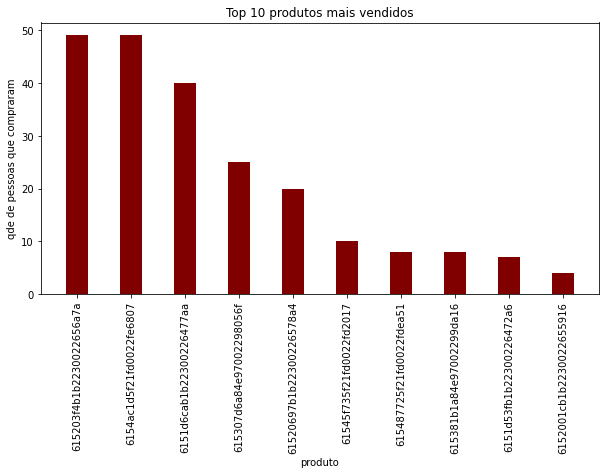

In [36]:
import matplotlib.pyplot as plt
import numpy as np

gasto_produtos_venda = gasto_produtos.sort_values(by=['numero_pessoas_servidas'], ascending=False)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(gasto_produtos_venda['id_produto'][:10], gasto_produtos_venda['numero_pessoas_servidas'][:10], color ='maroon',
        width = 0.4)
 
plt.xlabel("produto")
plt.ylabel("qde de pessoas que compraram")
plt.title("Top 10 produtos mais vendidos")
plt.xticks(rotation=90)
plt.show()

## Top 10 produtos mais lucrativos 

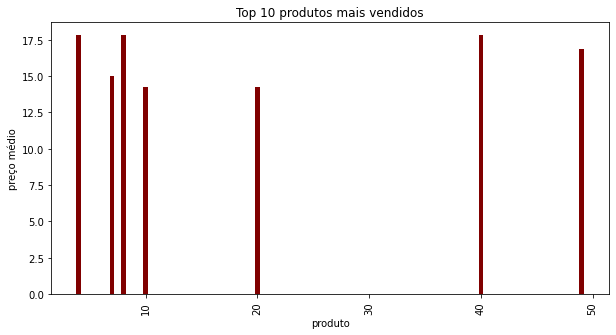

poucas pessoas gastam muito e muitas pessoas gastam pouco. Empresa com tendência a lucrar por lote de venda


In [37]:
import matplotlib.pyplot as plt
import numpy as np

gasto_produtos_venda = gasto_produtos.sort_values(by=['preco_medio_por_pessoa'], ascending=False)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(gasto_produtos_venda['numero_pessoas_servidas'][:10], gasto_produtos_venda['preco_medio_por_pessoa'][:10], color ='maroon',
        width = 0.4)
 
plt.xlabel("produto")
plt.ylabel("preço médio")
plt.title("Top 10 produtos mais vendidos")
plt.xticks(rotation=90)
plt.show()

print('poucas pessoas gastam muito e muitas pessoas gastam pouco. Empresa com tendência a lucrar por lote de venda')

## Empresa fornece delivery ?

In [38]:
tb_users_empres_end[['delivery_raio_km', 'delivery_sistema']]

,delivery_raio_km,delivery_sistema
0,25,NaN
1,25,NaN
2,25,NaN
3,25,NaN
4,25,NaN
5,25,NaN
6,25,NaN
7,25,NaN
8,25,NaN
9,25,NaN


# tb_cognatis

In [39]:
tb_cognatis = pd.read_csv('tb_solds_cognatis.csv', sep=';')

In [40]:
tb_cognatis

,SETOR_ATIV,UF,MUNICIPIO,CEP,TRABALHADORES,S_RENDA_MEDIA,S_FLUXO_PEDESTRE,S_FLUXO_VEICULOS,S_POP_TOTAL,S_DOM_PART_PERM,...,S_DE_50_99_FUNC,S_DE_100_249_FUNC,S_DE_250_499_FUNC,S_DE_500_999_FUNC,S_MAIS1000_FUNC,S_SUPERMERCADO,S_TT_PADARIA,S_ATACADO,S_HIPERMERCADO,S_MINIMERCADO
0,NaN,NaN,NaN,NaN,18776.596364,1852.325903,3.158788,4.933333,61660.275152,22297.529697,...,22.883636,12.442424,4.026667,2.001212,1.670303,8.768485,57.606061,23.126061,2.865455,85.970909
1,NaN,AC,Rio Branco,69900001.0,13125.000000,3502.669922,4.000000,6.000000,53376.000000,17146.000000,...,15.000000,15.000000,3.000000,4.000000,2.000000,3.000000,22.000000,3.000000,9.000000,184.000000
2,NaN,AC,Rio Branco,69900001.0,18364.000000,2477.159912,4.000000,6.000000,73460.000000,24698.000000,...,19.000000,19.000000,6.000000,2.000000,2.000000,14.000000,29.000000,27.000000,9.000000,111.000000
3,NaN,AC,Sena Madureira,NaN,960.000000,1225.869995,0.000000,0.000000,26675.500000,7823.500000,...,1.000000,0.000000,0.000000,0.500000,0.000000,3.000000,7.500000,5.000000,1.000000,84.000000
4,NaN,AC,Senador Guiomard,NaN,1102.000000,1272.079956,0.000000,1.000000,11183.000000,3732.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,42.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82386,SERVICOS,TO,PARAISO DO TOCANTINS,77600000.0,3622.000000,1266.873372,1.333333,3.333333,19705.000000,7031.000000,...,3.333333,3.333333,0.333333,0.666667,0.000000,22.333333,13.000000,23.333333,4.333333,43.333333
82387,SERVICOS,TO,PAU D:ARCO,77785000.0,195.000000,1397.069946,0.000000,0.000000,3525.000000,1190.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,9.000000
82388,SERVICOS,TO,PEIXE,77460000.0,40.000000,979.869995,0.000000,2.000000,4767.000000,1740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,23.000000
82389,SERVICOS,TO,PORTO NACIONAL,77500000.0,2123.500000,1397.145020,2.000000,5.000000,19474.500000,6495.000000,...,1.500000,3.500000,1.000000,0.000000,0.000000,14.500000,10.000000,4.000000,2.000000,41.000000


In [41]:
tb_cognatis['CEP'].dropna(inplace=True) #se nao possui cep nao dá pra analisar

In [42]:
tb_cognatis.rename(columns={'CEP':'cep'},inplace=True)

In [63]:
tb_users_empres_end.columns

Index(['id_usuario', 'id_fornecedor', 'nome_completo', 'data_ultima_compra',
       'qtde_total_compra', 'gasto_total', 'ultima_qtde_compra',
       'ticket_medio', 'aceita_thrid_party_mkt', 'aceita_mkt',
       'id_pagamento_fornecedor', 'id_ordem', 'status', 'id_produto_vendido',
       'id_produto', 'id_variacao_selecionada', 'valor_medida', 'tipo_medida',
       'numero_pessoas_servidas', 'preco', 'qtde', 'anotacao',
       'qde_gasto_cliente', 'id_avalicoes', 'id_cliente', 'revisao',
       'media_avaliacao', 'comparecimento', 'sabor', 'aparencia',
       'id_endereco', 'bairro', 'ponto_referencia', 'cidade', 'estado', 'uf',
       'pais', 'tipo', 'cep', 'nome_fornecedor', 'data_registro',
       'qtde_produtos', 'preco_medio', 'avaliacao_media', 'e_aprovado',
       'nome_empresa', 'delivery_raio_km', 'delivery_sistema', 'hora_abertura',
       'hora_fechamento', 'data_aprovacao', 'data_reprovacao'],
      dtype='object')

In [78]:
tb_cognatis['cep'].fillna('sem_dado', inplace=True)

# Dados do cep da empresa e concorrentes de demais localidades

In [79]:
empresa_cog = tb_cognatis.loc[tb_cognatis['cep'] == tb_users_empres_end['cep'][0]]
concorr_cog = tb_cognatis.loc[tb_cognatis['cep'] != tb_users_empres_end['cep'][0]]


In [80]:
empresa_cog

,SETOR_ATIV,UF,MUNICIPIO,cep,TRABALHADORES,S_RENDA_MEDIA,S_FLUXO_PEDESTRE,S_FLUXO_VEICULOS,S_POP_TOTAL,S_DOM_PART_PERM,...,S_DE_50_99_FUNC,S_DE_100_249_FUNC,S_DE_250_499_FUNC,S_DE_500_999_FUNC,S_MAIS1000_FUNC,S_SUPERMERCADO,S_TT_PADARIA,S_ATACADO,S_HIPERMERCADO,S_MINIMERCADO
4600,NaN,SP,Sao Paulo,1000001.0,11452.0,1777.689941,5.0,6.0,171262.0,59310.0,...,14.0,7.0,2.0,1.0,1.0,0.0,189.0,0.0,1.0,244.0
4601,NaN,SP,Sao Paulo,1000001.0,345115.0,3494.689941,5.0,6.0,113182.0,40038.0,...,14.0,5.0,3.0,3.0,2.0,0.0,104.0,0.0,2.0,169.0
4602,NaN,SP,Sao Paulo,1000001.0,40086.0,3067.439941,5.0,6.0,45962.0,17657.0,...,19.0,17.0,10.0,5.0,6.0,0.0,38.0,0.0,8.0,35.0
4603,NaN,SP,Sao Paulo,1000001.0,52362.0,2661.000000,5.0,6.0,91355.0,37877.0,...,72.0,39.0,10.0,5.0,5.0,0.0,71.0,0.0,3.0,46.0
4604,NaN,SP,Sao Paulo,1000001.0,52452.0,2070.370117,5.0,6.0,102089.0,40823.0,...,79.0,42.0,14.0,7.0,3.0,0.0,143.0,0.0,10.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,NaN,SP,Sao Paulo,1000001.0,6456.0,1097.540039,4.0,6.0,139456.0,45886.0,...,6.0,5.0,0.0,0.0,1.0,0.0,145.0,0.0,5.0,147.0
4771,NaN,SP,Sao Paulo,1000001.0,42834.0,1953.109985,5.0,6.0,103126.0,41162.0,...,75.0,51.0,11.0,4.0,2.0,0.0,108.0,0.0,7.0,87.0
4772,NaN,SP,Sao Paulo,1000001.0,13706.0,2396.080078,4.0,6.0,71431.0,24817.0,...,16.0,8.0,6.0,4.0,3.0,0.0,62.0,0.0,2.0,69.0
4773,NaN,SP,Sao Paulo,1000001.0,6828.0,1791.380005,4.0,6.0,83961.0,28927.0,...,8.0,7.0,0.0,2.0,0.0,0.0,78.0,0.0,1.0,89.0


In [82]:
list(empresa_cog.columns)

['SETOR_ATIV',
 'UF',
 'MUNICIPIO',
 'cep',
 'TRABALHADORES',
 'S_RENDA_MEDIA',
 'S_FLUXO_PEDESTRE',
 'S_FLUXO_VEICULOS',
 'S_POP_TOTAL',
 'S_DOM_PART_PERM',
 'S_PCT_CRIANCAS',
 'S_PCT_ADOLESCENTE',
 'S_PCT_JOVENS',
 'S_PCT_ADULTOS',
 'S_PCT_SENIOR',
 'S_PCT_IDOSOS',
 'S_RENDA_MEDIA_FAMILIAR',
 'S_DENSIDADE_POPULACAO_KM2',
 'S_PCT_CLASSE_A',
 'S_PCT_CLASSE_B',
 'S_PCT_CLASSE_C',
 'S_PCT_CLASSE_D',
 'S_PCT_CLASSE_E',
 'S_TX_CRESC_POP',
 'S_TX_CRESC_DOM',
 'S_TX_CRESC_RENDA_MEDIA',
 'S_RENDA_PER_CAPITA',
 'S_COMERCIALIZACAO',
 'S_QTD_EMPRESAS',
 'S_PCT_CNAE_AGRICOLA',
 'S_PCT_CNAE_COMERCIO',
 'S_PCT_CNAE_CONSTR_CIVIL',
 'S_PCT_CNAE_INDUSTRIA',
 'S_PCT_CNAE_SERVICOS',
 'S_PCT_CNAE_OUTROS',
 'S_SEM_FUNC',
 'S_DE_1_4_FUNC',
 'S_DE_5_9_FUNC',
 'S_DE_10_19_FUNC',
 'S_DE_20_49_FUNC',
 'S_DE_50_99_FUNC',
 'S_DE_100_249_FUNC',
 'S_DE_250_499_FUNC',
 'S_DE_500_999_FUNC',
 'S_MAIS1000_FUNC',
 'S_SUPERMERCADO',
 'S_TT_PADARIA',
 'S_ATACADO',
 'S_HIPERMERCADO',
 'S_MINIMERCADO']

## Cenário em que a empresa se encontra

In [91]:
cenario_empresa = empresa_cog[['TRABALHADORES',
 'S_RENDA_MEDIA',
 'S_FLUXO_PEDESTRE',
 'S_FLUXO_VEICULOS',
 'S_POP_TOTAL',
 'S_DOM_PART_PERM',
 'S_PCT_CRIANCAS',
 'S_PCT_ADOLESCENTE',
 'S_PCT_JOVENS',
 'S_PCT_ADULTOS',
 'S_PCT_SENIOR',
 'S_PCT_IDOSOS',
 'S_RENDA_MEDIA_FAMILIAR',
 'S_DENSIDADE_POPULACAO_KM2',
 'S_PCT_CLASSE_A',
 'S_PCT_CLASSE_B',
 'S_PCT_CLASSE_C',
 'S_PCT_CLASSE_D',
 'S_PCT_CLASSE_E',
 'S_TX_CRESC_POP',
 'S_TX_CRESC_DOM',
'S_SUPERMERCADO',
 'S_TT_PADARIA',
 'S_ATACADO',
 'S_HIPERMERCADO',
 'S_MINIMERCADO']].median()

cenario_concorr= concorr_cog[['TRABALHADORES',
 'S_RENDA_MEDIA',
 'S_FLUXO_PEDESTRE',
 'S_FLUXO_VEICULOS',
 'S_POP_TOTAL',
 'S_DOM_PART_PERM',
 'S_PCT_CRIANCAS',
 'S_PCT_ADOLESCENTE',
 'S_PCT_JOVENS',
 'S_PCT_ADULTOS',
 'S_PCT_SENIOR',
 'S_PCT_IDOSOS',
 'S_RENDA_MEDIA_FAMILIAR',
 'S_DENSIDADE_POPULACAO_KM2',
 'S_PCT_CLASSE_A',
 'S_PCT_CLASSE_B',
 'S_PCT_CLASSE_C',
 'S_PCT_CLASSE_D',
 'S_PCT_CLASSE_E',
 'S_TX_CRESC_POP',
 'S_TX_CRESC_DOM',
'S_SUPERMERCADO',
 'S_TT_PADARIA',
 'S_ATACADO',
 'S_HIPERMERCADO',
 'S_MINIMERCADO']].median()

In [92]:
cenario_empresa = pd.DataFrame(cenario_empresa).T

cenario_concorr = pd.DataFrame(cenario_concorr).T

In [93]:
cenario_empresa

,TRABALHADORES,S_RENDA_MEDIA,S_FLUXO_PEDESTRE,S_FLUXO_VEICULOS,S_POP_TOTAL,S_DOM_PART_PERM,S_PCT_CRIANCAS,S_PCT_ADOLESCENTE,S_PCT_JOVENS,S_PCT_ADULTOS,...,S_PCT_CLASSE_C,S_PCT_CLASSE_D,S_PCT_CLASSE_E,S_TX_CRESC_POP,S_TX_CRESC_DOM,S_SUPERMERCADO,S_TT_PADARIA,S_ATACADO,S_HIPERMERCADO,S_MINIMERCADO
0,16255.0,1810.76001,4.0,6.0,115993.0,41620.0,10.31,11.64,13.99,33.119999,...,45.369999,8.44,0.43,0.94,2.49,0.0,112.0,0.0,4.0,113.0


## Empresa : Fluxo de pedestre maior que fluxo de veículos ?

In [86]:
cenario_empresa['S_FLUXO_PEDESTRE'] > cenario_empresa['S_FLUXO_VEICULOS']

0    False
dtype: bool

# Empresa: Etarismo

In [87]:
cenario_empresa[['S_PCT_CRIANCAS',
 'S_PCT_ADOLESCENTE',
 'S_PCT_JOVENS',
 'S_PCT_ADULTOS',
 'S_PCT_SENIOR',
 'S_PCT_IDOSOS']].T

,0
S_PCT_CRIANCAS,10.310000
S_PCT_ADOLESCENTE,11.640000
S_PCT_JOVENS,13.990000
S_PCT_ADULTOS,33.119999
S_PCT_SENIOR,19.340000
S_PCT_IDOSOS,11.880000


## Empresa : Classe majoritária

In [88]:
cen = cenario_empresa[['S_PCT_CLASSE_A',
 'S_PCT_CLASSE_B',
 'S_PCT_CLASSE_C',
 'S_PCT_CLASSE_D',
 'S_PCT_CLASSE_E']].T

display(cen)
print('renda media familiar em relacao aos concorrentes',cenario_empresa['S_RENDA_MEDIA_FAMILIAR'][0]/concorr_cog['S_RENDA_MEDIA_FAMILIAR'].median()*100)
print('renda media por pessoa em relacao aos concorrentes %', cenario_empresa['S_RENDA_MEDIA'][0]/concorr_cog['S_RENDA_MEDIA'].median()*100)
print('densidade de pessoas por km em relacao aos concorrentes %',cenario_empresa['S_DENSIDADE_POPULACAO_KM2'][0]/concorr_cog['S_DENSIDADE_POPULACAO_KM2'].median()*100)
print('taxa de crescimento da populacao em relacao aos concorrentes %', (cenario_empresa['S_TX_CRESC_DOM'][0]/concorr_cog['S_TX_CRESC_DOM'].median()*100))

,0
S_PCT_CLASSE_A,3.050000
S_PCT_CLASSE_B,41.220001
S_PCT_CLASSE_C,45.369999
S_PCT_CLASSE_D,8.440000
S_PCT_CLASSE_E,0.430000


renda media familiar 163.6920480753345
renda media por pessoa % 112.90928007588815
densidade de pessoas por km % 468.358243078597
taxa de crescimento da populacao % 83.55704676508392


## Concorrentes

In [90]:
concorr_cog[['S_SUPERMERCADO','S_TT_PADARIA','S_ATACADO','S_HIPERMERCADO','S_MINIMERCADO']]

,S_SUPERMERCADO,S_TT_PADARIA,S_ATACADO,S_HIPERMERCADO,S_MINIMERCADO
0,8.768485,57.606061,23.126061,2.865455,85.970909
1,3.000000,22.000000,3.000000,9.000000,184.000000
2,14.000000,29.000000,27.000000,9.000000,111.000000
3,3.000000,7.500000,5.000000,1.000000,84.000000
4,0.000000,10.000000,0.000000,0.000000,42.000000
...,...,...,...,...,...
82386,22.333333,13.000000,23.333333,4.333333,43.333333
82387,7.000000,1.000000,0.000000,0.000000,9.000000
82388,1.000000,5.000000,0.000000,0.000000,23.000000
82389,14.500000,10.000000,4.000000,2.000000,41.000000


In [94]:
print('qde de supermercado S_SUPERMERCADO em relacao aos concorrentes % ',cenario_empresa['S_SUPERMERCADO'][0]/concorr_cog['S_SUPERMERCADO'].median()*100)
print('qde de padaria % em relacao aos concorrentes %', cenario_empresa['S_TT_PADARIA'][0]/concorr_cog['S_TT_PADARIA'].median()*100)
print('qde de S atacado em relacao aos concorrentes %',cenario_empresa['S_ATACADO'][0]/concorr_cog['S_ATACADO'].median()*100)
print('qde de S hipermercado em relacao aos concorrentes %', (cenario_empresa['S_HIPERMERCADO'][0]/concorr_cog['S_HIPERMERCADO'].median()*100))
print('qde de Minimercado em relacao aos concorrentes %', (cenario_empresa['S_MINIMERCADO'][0]/concorr_cog['S_MINIMERCADO'].median()*100))

qde de supermercado S_SUPERMERCADO em relacao aos concorrentes %  0.0
qde de padaria % em relacao aos concorrentes % 287.1794871794872
qde de S atacado em relacao aos concorrentes % 0.0
qde de S hipermercado em relacao aos concorrentes % 200.0
qde de Minimercado em relacao aos concorrentes % 182.25806451612902
